# **Perkenalan**

Nama : Agus Susanto

Batch : RMT-26

Objective : Membuat machine learning untuk memprediksi sleep disorder pada pasien rumah sakit

## **Conceptual Problems**

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

```
Bagging bekerja dengan menghasilkan beberapa subset acak dari train set dan melatih model pada setiap subset, hasil dari setiap prediksi akan di agregasikan untuk menghasilkan prediksi final. Latar belakang di gunakan nya untuk mengatasi overfitting dan membantu mengurangi varians model.
```

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

| Proses | Random Forest | Adaboostrap |
|---------|---------|---------|
| Pemilihan Sampel | Menggunakan teknik bootstrap sampling, yaitu mengambil sampel dengan penggantian dari data train. Setiap pohon dibangun pada subset acak dari data train    | AdaBoost memberikan bobot lebih besar pada sampel yang salah diprediksi oleh model sebelumnya.|
|Pemilihan Fitur|Setiap pohon di Random Forest hanya melihat sebagian kecil fitur yang dipilih secara acak untuk setiap split.|AdaBoost menggunakan semua fitur yang tersedia untuk membangun model pada setiap iterasi.|
|Pembangunan Model| Setiap pohon dalam Random Forest dibangun secara independen satu sama lain. Pohon-pohon ini bekerja bersama untuk menghasilkan hasil prediksi yang lebih baik.|Model dibangun secara iteratif, dengan setiap model berfokus pada kesalahan yang dibuat oleh model sebelumnya. Bobot sampel diubah setelah setiap iterasi untuk memberikan penekanan lebih besar pada sampel yang salah diprediksi.|
|Prediksi Final|Hasil akhir prediksi diambil melalui majority voting untuk klasifikasi atau rata-rata untuk regresi.| Hasil akhirnya diambil melalui weighted voting. Model dengan bobot lebih besar memberikan kontribusi lebih besar dalam pengambilan keputusan akhir.|

3. Jelaskan apa yang dimaksud dengan Cross Validation !

```
Cross-validation adalah suatu metodeuntuk menguji efektivitas suatu model dengan melatihnya menggunakan sebagian data input dan mengujinya pada sebagian data input yang berbeda dan belum pernah digunakan sebelumnya. Hal ini membantu menentukan seberapa baik performa model pada data baru. Cross Validation membantu mengidentifikasi apakah model cenderung overfitting atau memiliki performa yang baik secara umum.
```

# **Import Libraries**

In [2]:
#Library pengolahan data
import pandas as pd
import numpy as np

#Save model
import pickle
import json

#Library untuk membuat grafik
import matplotlib.pyplot as plt
import seaborn as sns

#Library untuk melakukan split dataframe ke data train dan test
from sklearn.model_selection import train_test_split

#Library untuk handling outlier
from feature_engine.outliers import Winsorizer

#Library untuk melakukan transformasi pada kolom dalam dataset
from sklearn.compose import ColumnTransformer

#Library untuk membuat pipeline agar proses alur kerja jadi satu
from sklearn.pipeline import Pipeline

#Library untuk melakukan scaling numeric data
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder

#Library untuk encoding data categorical ke numeric
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

#Library Algoritma
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

#Library untuk melakukan hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

#Library untuk melakukan columntransform
from sklearn.compose import ColumnTransformer

#Library untuk model evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score, make_scorer

# **Data Loading**

In [3]:
#Import data csv
df = pd.read_csv('P1M2_agus_susanto.csv', keep_default_na=False, na_filter=False) 

'''
keep_default_na=False, na_filter=False berguna untuk keep data dengan value none, karena berdasarkan info dataset bahwa none ini adalah pasien tanpa sleep disorder, sehingga di keep untuk bisa di explore pada EDA
'''

'\nkeep_default_na=False, na_filter=False berguna untuk keep data dengan value none, karena berdasarkan info dataset bahwa none ini adalah pasien tanpa sleep disorder, sehingga di keep untuk bisa di explore pada EDA\n'

In [4]:
#Menampilkan dataframe
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [5]:
#Menyimpan data agar bisa di akses ke jupiter notebook lain dalam folder yang sama untuk penggunaan data inference
%store df

Stored 'df' (DataFrame)


# **Exploratory Data Analysis (EDA)**

In [6]:
#Menampilkan dataframe
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Berdasarkan data dapat di lihat bahwa data Blood Preassure mempunyai bentuk value dengan 2 angka yang di pisah dengan /, sehingga akan di pisah menjadi 2 kolom, dimana dalam konsep blood preasure bahwa angka tersebut mewakili Blood Preassur Systolic dan Blood Preassur Diastolic. contoh 140/95 maka 140 adalah Blood Preassur Systolic dan 95 adalah Blood Preassur Diastolic.

In [7]:
# Memisahkan kolom 'Blood Pressure' menjadi dua kolom terpisah
df[['Bp_Systolic', 'Bp_Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

#drop kolom blood preassure
df.drop('Blood Pressure',axis=1, inplace=True)

# Mengubah tipe data kolom menjadi integer
df['Bp_Systolic'] = df['Bp_Systolic'].astype('int64')
df['Bp_Diastolic'] = df['Bp_Diastolic'].astype('int64')

# Menampilkan hasil
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Bp_Systolic,Bp_Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [8]:
#Menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  Bp_Systolic              374 non-null    int64  
 13  Bp_Diastolic             374 non-null    int64  
dtypes: float64(1), int64(9), o

Untuk mempermudah dalam pengolahan data, nama kolom dengan lebih dari 2 kata yang menggunakan pemisah spasi atau ' ' akan diganti menggunakan '_'.

In [9]:
# Mengubah spasi menjadi '_' langsung pada kolom
df.columns = df.columns.str.replace(' ', '_')

df

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,Bp_Systolic,Bp_Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [10]:
#Menampilkan statistik descriptif dataset
df.describe().round(2)

,Person_ID,Age,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,Heart_Rate,Daily_Steps,Bp_Systolic,Bp_Diastolic
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,187.50,42.18,7.13,7.31,59.17,5.39,70.17,6816.84,128.55,84.65
std,108.11,8.67,0.80,1.20,20.83,1.77,4.14,1617.92,7.75,6.16
min,1.00,27.00,5.80,4.00,30.00,3.00,65.00,3000.00,115.00,75.00
25%,94.25,35.25,6.40,6.00,45.00,4.00,68.00,5600.00,125.00,80.00
50%,187.50,43.00,7.20,7.00,60.00,5.00,70.00,7000.00,130.00,85.00
75%,280.75,50.00,7.80,8.00,75.00,7.00,72.00,8000.00,135.00,90.00
max,374.00,59.00,8.50,9.00,90.00,8.00,86.00,10000.00,142.00,95.00


In [11]:
#Menghitung data duplicated
print('Total Duplicated data : ', df.duplicated().sum())

Total Duplicated data :  0


Tidak terdapat duplicated data pada dataset.

In [12]:
#Menghitung missing value
print('Total missing value pada masing-masing kolom adalah :\n',df.isnull().sum())

Total missing value pada masing-masing kolom adalah :
 Person_ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep_Duration             0
Quality_of_Sleep           0
Physical_Activity_Level    0
Stress_Level               0
BMI_Category               0
Heart_Rate                 0
Daily_Steps                0
Sleep_Disorder             0
Bp_Systolic                0
Bp_Diastolic               0
dtype: int64


Tidak terdapat missing value pada dataset.

In [13]:
#Ukuran dataset
df.shape

(374, 14)

Total data yang akan kita gunakan adalah sebanyak 374 data dan 14 kolom.

In [14]:
#Menghitung nilai uniq dari masing-masing kolom
df.nunique()

Person_ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep_Duration              27
Quality_of_Sleep             6
Physical_Activity_Level     16
Stress_Level                 6
BMI_Category                 4
Heart_Rate                  19
Daily_Steps                 20
Sleep_Disorder               3
Bp_Systolic                 18
Bp_Diastolic                17
dtype: int64

## **Distribution of Sleep_Disorder**

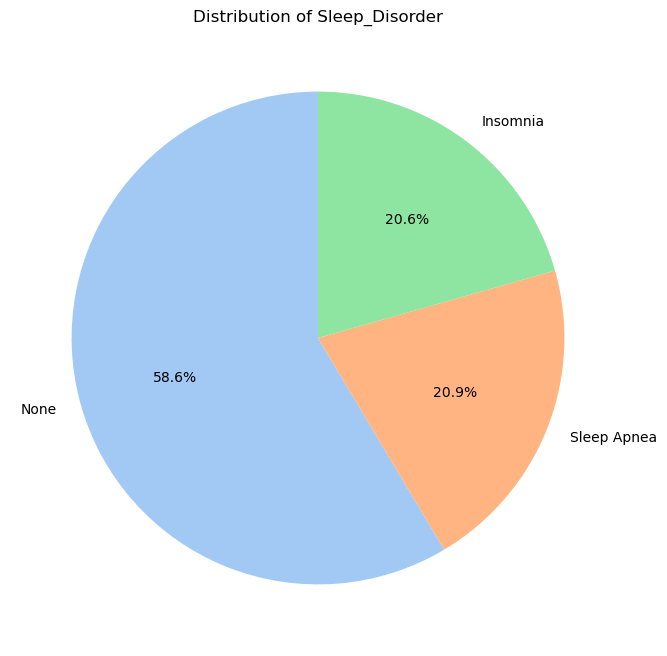

In [15]:
# Menghitung total nilai sesuai uniq value di kolom 'Sleep_Disorder'
default_counts = df['Sleep_Disorder'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

# title grafik
plt.title('Distribution of Sleep_Disorder')

# Memunculkan grafik
plt.show()

### **Insight**
Berdasarkan data bahwa 58.6% pasien tidak mengalami gangguan tidur, 20.9% mengalami sleep apnea dan 20.6% mengalami insomnia.

## **Sleep Disorder Vs Gender**

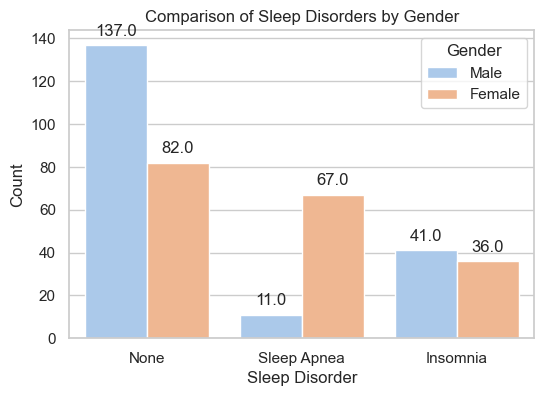

In [16]:
# Set style dari grafik
sns.set(style="whitegrid")

# Membuat bar chart
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Sleep_Disorder', hue='Gender', data=df, palette='pastel')

# Membuat labels dan title
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.title('Comparison of Sleep Disorders by Gender')

# Menampilkan nilai di dalam chart
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Menampilkan grafik
plt.show()

### **Insight**
Berdasarkan grafik bahwa sleep apnea mayoritas dialami oleh perempuan, sedangkan insomnia di dominasi oleh laki-laki.

## **Sleep Disorder Vs Occupation**

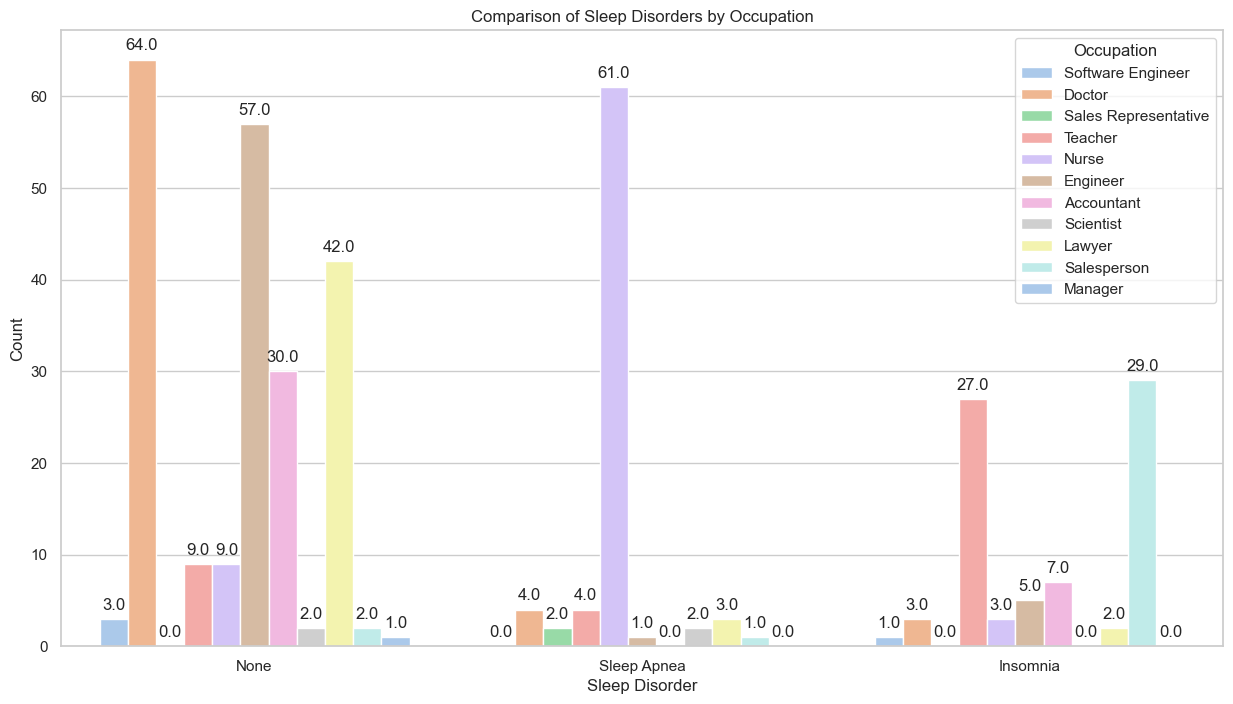

In [56]:
# Set style dari grafik
sns.set(style="whitegrid")

# Membuat bar chart
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='Sleep_Disorder', hue='Occupation', data=df, palette='pastel')

# Membuat labels dan title
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.title('Comparison of Sleep Disorders by Occupation')

# Menampilkan nilai di dalam chart
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Menampilkan grafik
plt.show()

### **Insight**
Berdasarkan pekerjaan sleep apnea rata-rata dialami oleh Nurse, doctor dan teacher sedangkan insomnia rata-rata dialami oleh salesperson, teacher dan accountant.

## **Sleep Disorder Vs Physical Data**

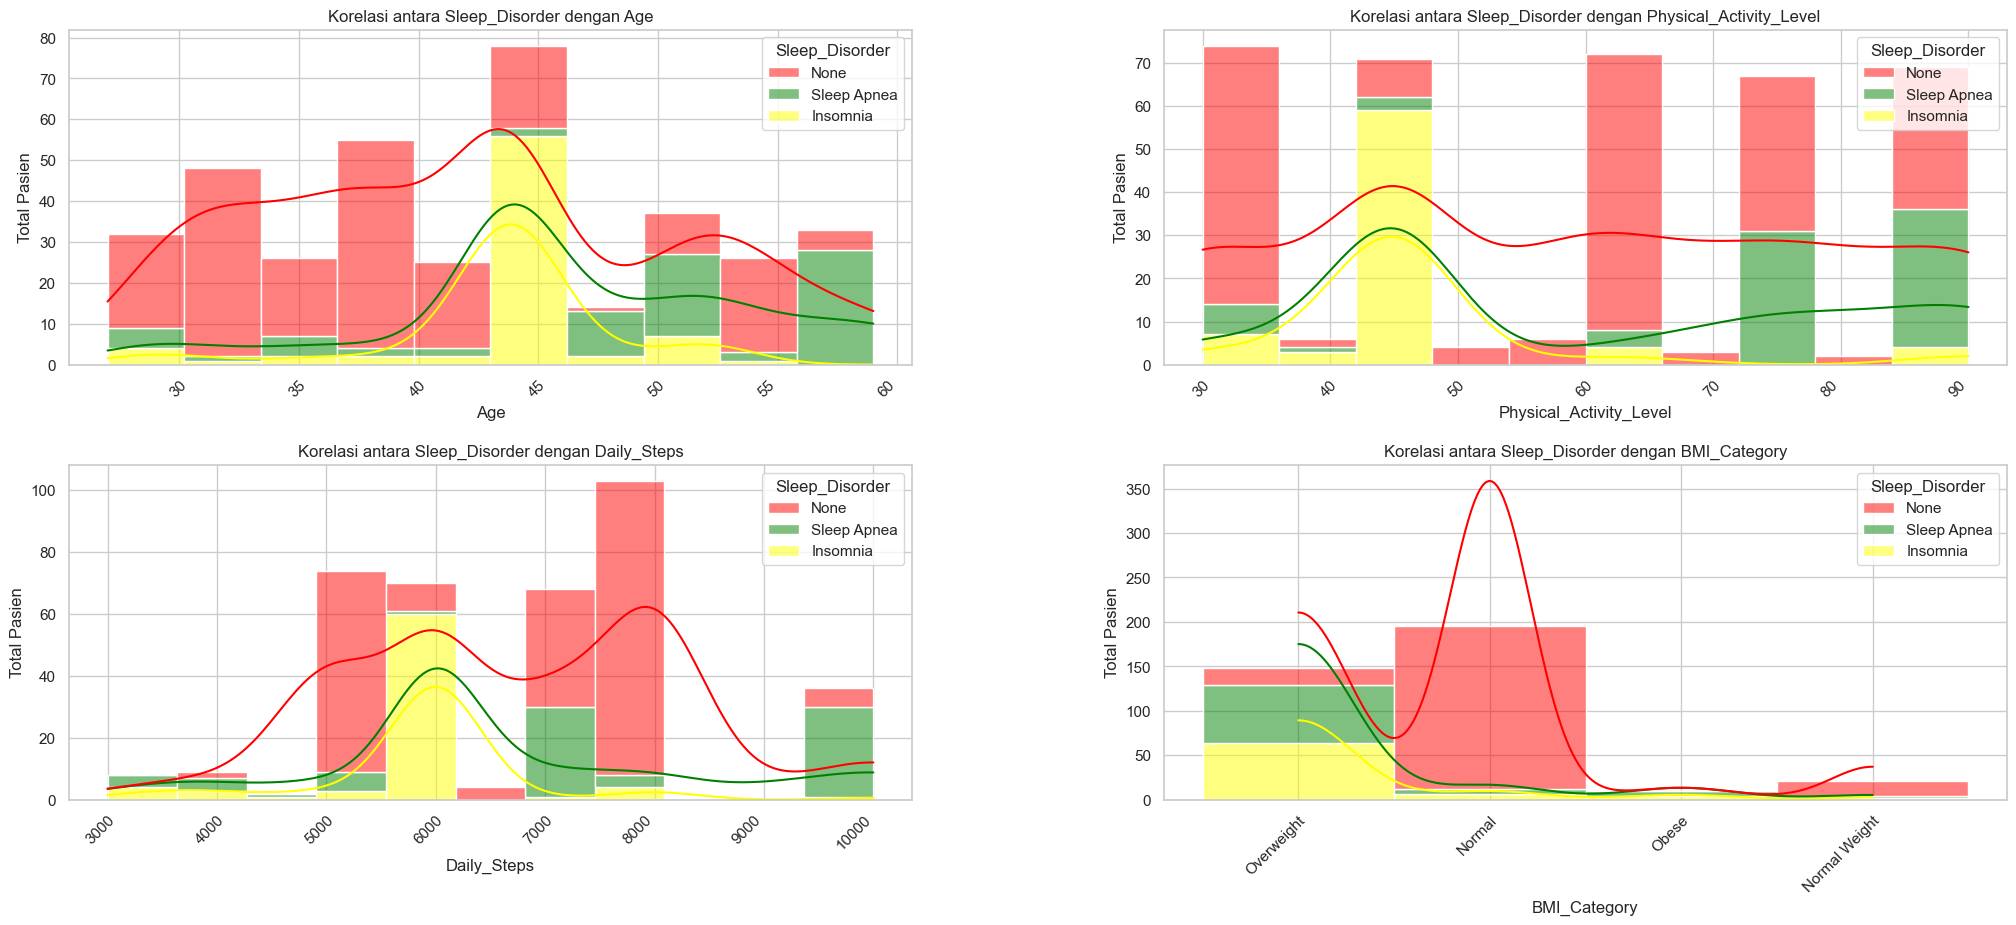

In [19]:
#Ukuran grafik
fig = plt.figure(figsize=(25, 10))

#List nama kolom yang akan di buatkan tabel korelasi
cols_act = ['Age', 'Physical_Activity_Level', 'Daily_Steps', 'BMI_Category']


#total baris grafik
num_rows = 2

#total kolom grafik
num_cols = 2


for index in range(1, num_rows*num_cols + 1):
  '''
  Looping untuk membuat grafik korelasi sleep disorder dengan beberapa kolom
  '''

  #menambah subplot
  fig.add_subplot(num_rows, num_cols, index)

  #menyesuaikan bentuk tampilan axis x
  plt.xticks(rotation=45, ha="right", wrap=True)

  #Membuat chart
  sns.histplot(data=df, x=cols_act[index-1], hue='Sleep_Disorder',kde=True, palette={'Sleep Apnea': 'green', 'Insomnia': 'yellow', 'None': 'red'},  multiple="stack")
  
  #Membuat judul grafik
  plt.title(f'Korelasi antara Sleep_Disorder dengan {cols_act[index-1]}')
  
  #Menentukan nama axis x
  plt.xlabel(f'{cols_act[index-1]}')
  
  #Menentukan nama axis y
  plt.ylabel('Total Pasien')
  

#mengatur jarak antar chart
plt.subplots_adjust(hspace=0.3, wspace=0.3)

#Menampilkan chart
plt.show()

### **Insight**
Berdasarkan grafik dapat di ambil insight bahwa :
1. Insomnia
    * Dialami oleh pasien dengan Mayoritas umur 40 -55 Tahun.
    * Level aktifitas fisik yang rendah dengan rata-rata 40-50 menit per hari.
    * Jumlah langkah harian yang rendah antara 5000-7000 langkah per hari.
    * Rata-rata mempunyai BMI Categori Overweight.
2. Sleep Apnea
    * Dialami oleh pasien dengan umur di atas 45 tahun, yang berarti semakin bertambah umur semakin tinggi untuk terdiagnosis sleep apnea.
    * Level aktifitas fisik dan Jumlah langkah harian yang makin tinggi dapat meningkatkan terdiagnosa sleep apnea, karena dengan tingginya aktifitas fisik maka akan membuat kelelahan yang dapat menjadi salah satu penyebab sleep apnea.
    * Rata-rata mempunyai BMI Categori Overweight.
3. None
    * Pasien Normal rata-rata berumur di bawah 45 tahun.
    * Mempunyai aktifitas fisik rata-rata di atas 60 jam perhari.
    * Dengan jumlah langkah harian 5000-8000 langkah per hari.

## **Sleep Disorder Vs Sleep Data**

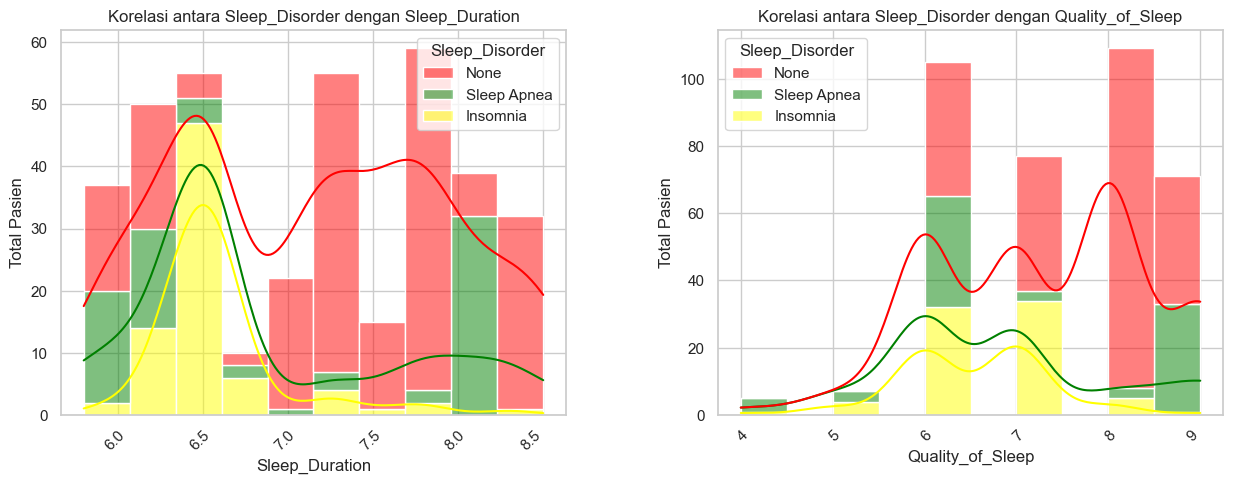

In [20]:
#Ukuran grafik
fig = plt.figure(figsize=(15, 5))

#List nama kolom yang akan di buatkan tabel korelasi
cols_sleep = ['Sleep_Duration', 'Quality_of_Sleep']

#total baris grafik
num_rows = 1

#total kolom grafik
num_cols = 2


for index in range(1, num_rows*num_cols + 1):
  '''
  Looping untuk membuat grafik korelasi sleep disorder dengan beberapa kolom
  '''

  #menambah subplot
  fig.add_subplot(num_rows, num_cols, index)

  #menyesuaikan bentuk tampilan axis x
  plt.xticks(rotation=45, ha="right", wrap=True)

  #Membuat chart
  sns.histplot(data=df, x=cols_sleep[index-1], hue='Sleep_Disorder',kde=True, palette={'Sleep Apnea': 'green', 'Insomnia': 'yellow', 'None': 'red'},  multiple="stack")
  
  #Membuat judul grafik
  plt.title(f'Korelasi antara Sleep_Disorder dengan {cols_sleep[index-1]}')
 
  #Menentukan nama axis x
  plt.xlabel(f'{cols_sleep[index-1]}')
 
  #Menentukan nama axis y
  plt.ylabel('Total Pasien')
  

#mengatur jarak antar chart
plt.subplots_adjust(hspace=1, wspace=0.3)

#Menampilkan chart
plt.show()

### **Insight**

Berdasarkan grafik dapat di ambil insight bahwa :
1. Insomnia
    * Dialami oleh pasien dengan durasi tidur di bawah 7 jam atau rentang 6-7 jam per hari. 
    * Selain itu kualitas tidur dari pasien dengan insomnia berapa di angka 5-7.
2. Sleep Apnea
    * Durasi tidur yang terlalu sedikit dan terlalu banyak dapat mempengaruhi sleep apnea.
    * Kualitas tidur tidak berpengaruh dalam sleep apnea.
3. Normal
    * Pasien normal umum nya mempunyai jumlah waktu tidur cukup dengan rentang 7-8 jam perhari dengan kualitas tidur 6-9.

## **Sleep Disorder Vs Medical Data**

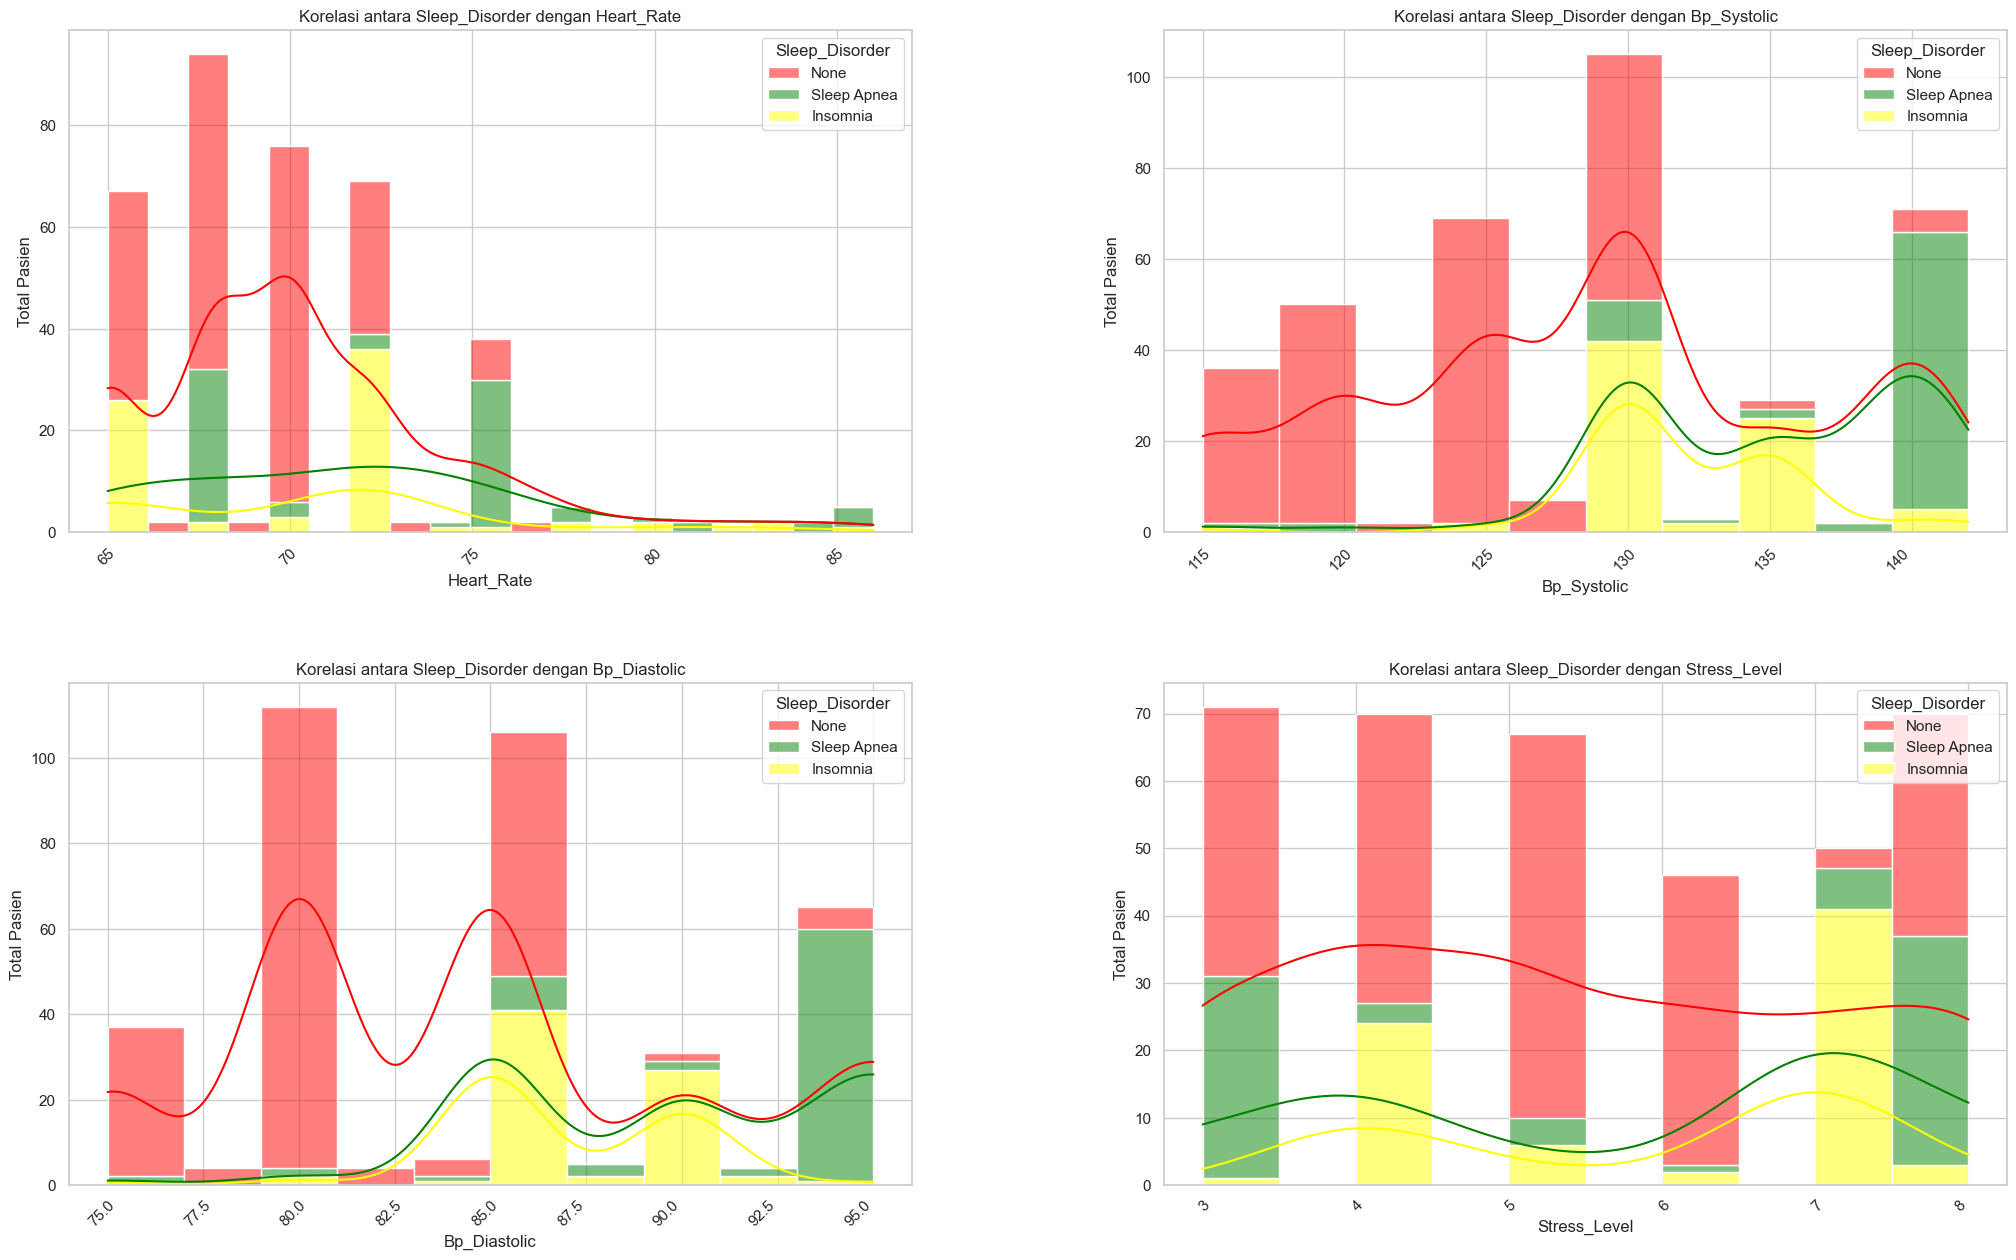

In [21]:
#Ukuran grafik
fig = plt.figure(figsize=(25, 15))

#List nama kolom yang akan di buatkan tabel korelasi
cols_med = ['Heart_Rate', 'Bp_Systolic', 'Bp_Diastolic', 'Stress_Level']

#total baris grafik
num_rows = 2

#total kolom grafik
num_cols = 2


for index in range(1, num_rows*num_cols + 1):
  '''
  Looping untuk membuat grafik korelasi sleep disorder dengan beberapa kolom
  '''

  #menambah subplot
  fig.add_subplot(num_rows, num_cols, index)

  #menyesuaikan bentuk tampilan axis x
  plt.xticks(rotation=45, ha="right", wrap=True)

  #Membuat chart
  sns.histplot(data=df, x=cols_med[index-1], hue='Sleep_Disorder', kde=True,
                 palette={'Sleep Apnea': 'green', 'Insomnia': 'yellow', 'None': 'red'},
                  multiple="stack") 
    
  #Membuat judul grafik
  plt.title(f'Korelasi antara Sleep_Disorder dengan {cols_med[index-1]}')
  
  #Menentukan nama axis x
  plt.xlabel(f'{cols_med[index-1]}')
  
  #Menentukan nama axis y
  plt.ylabel('Total Pasien')
  
#mengatur jarak antar chart
plt.subplots_adjust(hspace=0.3, wspace=0.3)

#Menampilkan chart
plt.show()

### **Insight**
Berdasarkan grafik dapat di ambil insight bahwa :
1. Insomnia
    * Heart rate 65-75 dimana di anggap normal, sehingga tidak berpengaruh terhadap insomnia.
    * Blood Preasure Systolic dari pasien dengan insomnia rata-rata pada range 125-140, nilai ini cukup tinggi di bandingkan angka normal yaitu kurang dari 120.
    * Blood Preasure Diastolic dengan insomnia rata-rata pada range 85-95, nilai ini cukup tinggi di bandingkan angka normal yaitu kurang dari 80.
    * Pasien dengan insomnia mempunyai stress level yang cukup tinggi.
2. Sleep Apnea
    * Heart rate 65-75 dimana di anggap normal, sehingga tidak berpengaruh terhadap insomnia.
    * Blood Preasure Systolic dari pasien dengan insomnia rata-rata pada range 130-140, nilai ini cukup tinggi di bandingkan angka normal yaitu kurang dari 120.
    * Blood Preasure Diastolic dengan insomnia rata-rata pada range 90-95, nilai ini cukup tinggi di bandingkan angka normal yaitu kurang dari 80
    * Pasien dengan sleep apnea mempunyai stress level yang cukup tinggi.
3. None
    * Pasien normal umum nya mempunyai heart rate yang normal di bawah 100.
    * Untuk blood preasure rata-rata berada di bawah batas normal.
    * Stress level pasien normal rata-rata berada pada 3-5.

# **Feature Engineering**

In [22]:
# Split data Features dan data Target
X = df.drop(df[['Person_ID','Sleep_Disorder']], axis=1)
y = df['Sleep_Disorder']

# Split Train-Set dan Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

#Menampikan ukuran data
print('Train Size : ', y_train.shape)
print('Test Size  : ', y_test.shape)

Train Size :  (299,)
Test Size  :  (75,)


## **Handling Missing Value**

In [23]:
#Menghitung missing value
print('Total missing value pada X_train adalah :\n',y_train.isnull().sum())
print('')
print('Total missing value pada X_test adalah :\n',y_test.isnull().sum())

Total missing value pada X_train adalah :
 0

Total missing value pada X_test adalah :
 0


## **Handling Outlier**

In [24]:
# menentukan nama kolom dengan tipe category ordinal
cat_ordinal_cols = ['Gender']

# menentukan nama kolom dengan tipe category nominal
cat_nominal_cols = ['Occupation','Quality_of_Sleep','BMI_Category', 'Stress_Level']

# menentukan nama kolom dengan tipe numeric
numeric_cols = ['Age', 'Sleep_Duration', 'Physical_Activity_Level', 'Heart_Rate','Daily_Steps','Bp_Systolic','Bp_Diastolic']

In [25]:
# Dictionary sementara
skewdf = []

for i in numeric_cols:

    '''
    Looping untuk melakukan perhitungan skewness dari data numeric
    dan memasukan nya kedalam dictionary sementara
    '''

    #Menghitung skewness
    skew_val = X_train[i].skew()

    #Round data
    round_skew = round(skew_val, 4)

    #Condition untuk nilai skewness
    skewness_category = ''
    if skew_val > 1 or skew_val < -1:
      #Jika nilai skewness >1 atau <-1 maka skewness Extreme
        skewness_category = 'Extreme'
    elif skew_val >= 0.5  or skew_val <= -0.5:
      #Jika nilai skewness >=0.5 atau <=-0.5 maka skewness moderate
        skewness_category = 'Moderate'
    else:
      #jika nilai skewness di luar dari angka else sebelum nya maka distibusi normal
        skewness_category = 'Normal'

    # membuat data setiap hasil dari looping dan condition
    skcat = pd.DataFrame({'Feature': [i], 'Skewness': [skew_val], 'Skewness Category': [skewness_category]})

    # menambahkan data hasil looping dan condition ke dictionary sementara
    skewdf.append(skcat)


# Concatenate menggabungkan semua dataframe looping ke satu dataframe
skewness_df = pd.concat(skewdf, ignore_index=True)

# menampilkan hasil dataframe
skewness_df

,Feature,Skewness,Skewness Category
0,Age,0.228916,Normal
1,Sleep_Duration,0.068012,Normal
2,Physical_Activity_Level,0.102246,Normal
3,Heart_Rate,1.141191,Extreme
4,Daily_Steps,0.244148,Normal
5,Bp_Systolic,-0.062878,Normal
6,Bp_Diastolic,0.364317,Normal


Rata-rata persebaran data pada dataset adalah normal atau tidak ada outlier kecuali pada kolom Heart_Rate.

In [26]:
#Handling awal satu kolom dengan category moderate distribution
wz = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['Age'])

#Fit hasil handling ke dataframe X_train
X_train_capped = wz.fit_transform(X_train)

#Fit hasil handling ke dataframe X_test
X_test_capped = wz.transform(X_test)

In [27]:
#Hapus baris latitude yang sudah di handling data outlier agar tidak berulang di looping kedepan
skewness_df = skewness_df.drop(0)

In [28]:
#Mengambil nama kolom dalam dataframe uji skewness dengan category skewness Normal
normalcol = skewness_df.loc[skewness_df['Skewness Category'] == 'Normal', 'Feature'].tolist()
for i in normalcol:
  '''
  Looping untuk melakukan handling outlier dengan distribusi normal
  '''
  #Handling outlier
  wz = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=[i])
  #Fit hasil handling ke x_train
  X_train_capped = wz.fit_transform(X_train_capped)
  #Fit hasil handling ke x_test
  X_test_capped = wz.transform(X_test_capped)

In [29]:
#Mengambil nama kolom dalam dataframe uji skewness dengan category skewness extreme
extreemecol = skewness_df.loc[skewness_df['Skewness Category'] == 'Extreme', 'Feature'].tolist()
for i in extreemecol:
  '''
  Looping untuk melakukan handling outlier dengan skewness moderate
  '''

  #Handling outlier
  wz = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=[i])

  #Fit hasil handling ke x_train
  X_train_capped = wz.fit_transform(X_train_capped)

  #Fit hasil handling ke x_test
  X_test_capped = wz.transform(X_test_capped)

In [30]:
# Dictionary sementara
skewdfafter = []

for i in numeric_cols:

    '''
    Looping untuk melakukan perhitungan skewness dari data hasil handling outlier
    dan memasukan nya kedalam dictionary sementara
    '''

    #Menghitung skewness
    skew_val = X_train_capped[i].skew()

    #Round data
    round_skew = round(skew_val, 4)

    #Condition untuk nilai skewness
    skewness_category = ''
    if skew_val > 1 or skew_val < -1:
      #Jika nilai skewness >1 atau <-1 maka skewness Extreme
        skewness_category = 'Extreme'
    elif skew_val >= 0.5  or skew_val <= -0.5:
      #Jika nilai skewness >=0.5 atau <=-0.5 maka skewness moderate
        skewness_category = 'Moderate'
    else:
      #jika nilai skewness di luar dari angka else sebelum nya maka distibusi normal
        skewness_category = 'Normal'

    # membuat data setiap hasil dari looping dan condition
    skcat = pd.DataFrame({'Feature': [i], 'Skewness': [skew_val], 'Skewness Category': [skewness_category]})

    # menambahkan data hasil looping dan condition ke dictionary sementara
    skewdfafter.append(skcat)


# Concatenate menggabungkan semua dataframe looping ke satu dataframe
skewness_df_after = pd.concat(skewdfafter, ignore_index=True)

# menampilkan hasil dataframe
skewness_df_after

,Feature,Skewness,Skewness Category
0,Age,0.228916,Normal
1,Sleep_Duration,0.068012,Normal
2,Physical_Activity_Level,0.102246,Normal
3,Heart_Rate,1.025239,Extreme
4,Daily_Steps,0.244148,Normal
5,Bp_Systolic,-0.062878,Normal
6,Bp_Diastolic,0.364317,Normal


## **Numeric Scaling & Categoric Encoding**

## **Scaling & Encoding Feature**

In [31]:
# ColumnTransofrmer untuk melakukan  proses encoding data category dan scaling data numeric
preprocessor = ColumnTransformer(
    transformers=[

        #data dengan tipe category ordinal akan di encode menggunakan ordinal encoder
        ('cat_ordinal', OrdinalEncoder(categories=[['Female', 'Male']]), cat_ordinal_cols),
        
        #data dengan tipe category nominal akan di encode menggunakan onehot encoder
        ('cat_nominal', OneHotEncoder(handle_unknown='ignore'), cat_nominal_cols),

        #Melakukan scaller data numeric, karena mostly data mempunyai skewness normal sehingga kita akan menggunakan StandardScaler
        ('num', StandardScaler(), numeric_cols)
    ],

    #argumen untuk kolom yang tidak akan di transform
    remainder='passthrough'
)

## **Encoding Target**

Value pada kolom target berbentuk string categoric sehingga akan kita lakukan encoding terlebih dahulu menggunakan labelencoding.

In [32]:
# Feature Encoding - Target
le = LabelEncoder()
le.fit(y_train)

#Tranform data y_train
y_train_encoded = le.transform(y_train)

#Tranform data y_test
y_test_encoded = le.transform(y_test)

In [33]:
# Save class encding names ke variable agar bisa di gunakan untuk conversi akhir pada hasil prediksi
classes = le.classes_
classes

array(['Insomnia', 'None', 'Sleep Apnea'], dtype=object)

# **Model Definition**

## **Algoritma Selection**


### **KNeighborsClassifier**

In [34]:
# pipeline dengan preprocessing and Algoritma model
pipelineKnn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Fit pipeline pada training data
pipelineKnn.fit(X_train_capped, y_train_encoded)

# Predict menggunakan test set
y_pred = pipelineKnn.predict(X_test_capped)

# Evaluasi model
print('KNeighborsClassifier:')
print('---')
print('Accuracy of KNeighborsClassifier classifier on test set: {:.2f}'.format(accuracy_score(y_test_encoded, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test_encoded, y_pred, average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test_encoded, y_pred, average='weighted')))
print('F1 Score: {:.2f}'.format(f1_score(y_test_encoded, y_pred, average='weighted')))

KNeighborsClassifier:
---
Accuracy of KNeighborsClassifier classifier on test set: 0.87
Precision: 0.87
Recall: 0.87
F1 Score: 0.87


#### **Cross Validation - KNeighborsClassifier**

In [35]:
#Membuat score dengan f1 score
f1_scorer = make_scorer(f1_score, average='weighted')

#melakukan cross validation
f1_train_cross_val = cross_val_score(pipelineKnn,
                                     X_train_capped,
                                     y_train,
                                     cv=3,
                                     scoring=f1_scorer )

#Menampilkan hasil evaluasi
print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.879      0.92998021 0.90975949]
F1 Score - Mean - Cross Validation :  0.9062465684942934
F1 Score - Std - Cross Validation  :  0.020960296315454405
F1 Score - Range of Test-Set       :  0.885286272178839 - 0.9272068648097478


#### **Insight - KNeighborsClassifier**

Berdasarkan hasil evaluasi jika menggunakan KNeighborsClassifier F1 Score mencapai 0.87, dan pada uji dengan cross validation nilai F1 Score sudah mendekati F1 Score Range dari cross validation walau masih di bawah rata-rata nya.

### **SVM**

In [36]:
# pipeline dengan preprocessing and Algoritma model
pipelinesvc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

# Fit pipeline pada training data
pipelinesvc.fit(X_train_capped, y_train_encoded)

# Predict menggunakan test set
y_pred = pipelinesvc.predict(X_test_capped)

# Evaluasi model
print('SVM classifier:')
print('---')
print('Accuracy of SVM classifier on test set: {:.2f}'.format(accuracy_score(y_test_encoded, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test_encoded, y_pred, average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test_encoded, y_pred, average='weighted')))
print('F1 Score: {:.2f}'.format(f1_score(y_test_encoded, y_pred, average='weighted')))

SVM classifier:
---
Accuracy of SVM classifier on test set: 0.89
Precision: 0.90
Recall: 0.89
F1 Score: 0.89


#### **Cross Validation - SVM**

In [37]:
#Membuat score dengan f1 score
f1_scorer = make_scorer(f1_score, average='weighted')

#melakukan cross validation
f1_train_cross_val = cross_val_score(pipelinesvc,
                                     X_train_capped,
                                     y_train,
                                     cv=3,
                                     scoring=f1_scorer )

#Menampilkan hasil evaluasi
print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.8893055  0.92034188 0.91847106]
F1 Score - Mean - Cross Validation :  0.9093728152914529
F1 Score - Std - Cross Validation  :  0.014210271964284255
F1 Score - Range of Test-Set       :  0.8951625433271686 - 0.9235830872557371


#### **Insight - SVM**

Berdasarkan hasil evaluasi jika menggunakan SVM hasil F1 Score mencapai 0.89, dan pada uji dengan cross validation nilai F1 Score berada pada F1 Score Range dari cross validation walau masih di bawah rata-rata nya.

### **Decision Tree**

In [38]:
# pipeline dengan preprocessing and Algoritma model
pipelinedestr = Pipeline([
    ('preprocessor', preprocessor),
    ('Decisiontree	', DecisionTreeClassifier())
])

# Fit pipeline pada training data
pipelinedestr.fit(X_train_capped, y_train_encoded)

# Predict menggunakan test set
y_pred = pipelinedestr.predict(X_test_capped)

# Evaluasi model
print('Decision Tree:')
print('---')
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(accuracy_score(y_test_encoded, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test_encoded, y_pred, average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test_encoded, y_pred, average='weighted')))
print('F1 Score: {:.2f}'.format(f1_score(y_test_encoded, y_pred, average='weighted')))

Decision Tree:
---
Accuracy of Decision Tree classifier on test set: 0.89
Precision: 0.90
Recall: 0.89
F1 Score: 0.89


#### **Cross Validation - Decision Tree**

In [39]:
#Membuat score dengan f1 score
f1_scorer = make_scorer(f1_score, average='weighted')

#melakukan cross validation
f1_train_cross_val = cross_val_score(pipelinedestr,
                                     X_train_capped,
                                     y_train,
                                     cv=3,
                                     scoring=f1_scorer )

#Menampilkan hasil evaluasi cross validation
print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.8586945  0.87122807 0.89855823]
F1 Score - Mean - Cross Validation :  0.8761602662091179
F1 Score - Std - Cross Validation  :  0.016643802989406625
F1 Score - Range of Test-Set       :  0.8595164632197113 - 0.8928040691985245


#### **Insight - Decision Tree**

Berdasarkan hasil evaluasi jika menggunakan Decision Tree hasil F1 Score mencapai 0.88, dan pada uji dengan cross validation nilai F1 Score berada pada F1 Score Range dari cross validation dan berada di atas rata-rata F1 Score Cross Validation.

### **Random Forest**

In [40]:
# pipeline dengan preprocessing and Algoritma model
pipelinerfs = Pipeline([
    ('preprocessor', preprocessor),
    ('RandomForest', RandomForestClassifier(n_estimators=100, max_depth=6, random_state=10))
])

# Fit the pipeline on the training data
pipelinerfs.fit(X_train_capped, y_train_encoded)

# Predict menggunakan test set
y_pred = pipelinerfs.predict(X_test_capped)

# Evaluasi model
print('Random Forest Classifier:')
print('---')
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(accuracy_score(y_test_encoded, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test_encoded, y_pred, average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test_encoded, y_pred, average='weighted')))
print('F1 Score: {:.2f}'.format(f1_score(y_test_encoded, y_pred, average='weighted')))

Random Forest Classifier:
---
Accuracy of Random Forest classifier on test set: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91


#### **Cross Validation - Random Forest**

In [41]:
#Membuat score dengan f1 score
f1_scorer = make_scorer(f1_score, average='weighted')

#melakukan cross validation
f1_train_cross_val = cross_val_score(pipelinerfs,
                                     X_train_capped,
                                     y_train,
                                     cv=3,
                                     scoring=f1_scorer )

#Menampilkan hasil evaluasi cross validation
print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.88857463 0.93042735 0.91847106]
F1 Score - Mean - Cross Validation :  0.9124910152749174
F1 Score - Std - Cross Validation  :  0.017601765112209903
F1 Score - Range of Test-Set       :  0.8948892501627075 - 0.9300927803871273


#### **Insight - Random Forest**

Berdasarkan hasil evaluasi jika menggunakan Random Forest hasil F1 Score mencapai 0.91, dan pada uji dengan cross validation nilai F1 Score berada pada F1 Score Range dari cross validation dan sama dengan rata-rata F1 Score Cross Validation.

### **Boosting - AdaBoost**

In [59]:
# pipeline dengan preprocessing and Algoritma model
pipeline_adaboost = Pipeline([
    ('preprocessor', preprocessor),
    ('AdaBoost', AdaBoostClassifier())
])

# Fit pipeline pada training data
pipeline_adaboost.fit(X_train_capped, y_train_encoded)

# Predict menggunakan test set
y_pred_adaboost = pipeline_adaboost.predict(X_test_capped)

# Evaluasi model
print('AdaBoost with Decision Tree base model:')
print('---')
print('Accuracy of AdaBoost classifier on test set: {:.2f}'.format(accuracy_score(y_test_encoded, y_pred_adaboost)))
print('Precision: {:.2f}'.format(precision_score(y_test_encoded, y_pred_adaboost, average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test_encoded, y_pred_adaboost, average='weighted')))
print('F1 Score: {:.2f}'.format(f1_score(y_test_encoded, y_pred_adaboost, average='weighted')))

AdaBoost with Decision Tree base model:
---
Accuracy of AdaBoost classifier on test set: 0.81
Precision: 0.85
Recall: 0.81
F1 Score: 0.82


#### **Cross Validation - Boosting - AdaBoost**

In [44]:
#Membuat score dengan f1 score
f1_scorer = make_scorer(f1_score, average='weighted')

#melakukan cross validation
f1_train_cross_val = cross_val_score(pipeline_adaboost,
                                     X_train_capped,
                                     y_train,
                                     cv=3,
                                     scoring=f1_scorer )

#Menampilkan hasil evaluasi cross validation
print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.83346543 0.68806537 0.90790246]
F1 Score - Mean - Cross Validation :  0.8098110831410182
F1 Score - Std - Cross Validation  :  0.09129341937944047
F1 Score - Range of Test-Set       :  0.7185176637615778 - 0.9011045025204587


#### **Insight - Boosting - AdaBoost**

Berdasarkan hasil evaluasi jika menggunakan Bossting Adaboost hasil F1 Score mencapai 0.82, dan pada uji dengan cross validation nilai F1 Score berada pada F1 Score Range dari cross validation dan di atas rata-rata F1 Score Cross Validation.

### **Insight Algoritma Selection**

Berdasarkan uji dari masing-masing algoritma maka **Random Forest** mempunyai accuracy dan F1 yang tinggi yaitu 0.91 dan berdasarkan uji dengan cross validation menunjukan nilai yang bagus dan masih dalam range, sehingga algoritma ini yang akan di gunakan dalam model final.

## **Hyperparameter Tuning**

In [45]:
# Menentukan grid search parameters
param_grid = {
    'RandomForest__n_estimators': [50, 100, 150],
    'RandomForest__max_depth': [None, 10, 20, 30],
    'RandomForest__min_samples_split': [2, 5, 10],
    'RandomForest__min_samples_leaf': [1, 2, 4],
    'RandomForest__bootstrap': [True, False]
}

# Membuat grid search dengan cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=pipelinerfs, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)

# Fit grid search ke data set
grid_result = grid_search.fit(X_train_capped, y_train_encoded)

# Menampilkan parameter terbaik
print('Best parameters : ', grid_search.best_params_)

Best parameters :  {'RandomForest__bootstrap': True, 'RandomForest__max_depth': 10, 'RandomForest__min_samples_leaf': 1, 'RandomForest__min_samples_split': 5, 'RandomForest__n_estimators': 100}


### **Insight Hyperparameter Tuning**

Hyperparameter terbaik dari hasil tuning menggunakan Random Forest adalah : 'RandomForest__bootstrap': True, 'RandomForest__max_depth': 10, 'RandomForest__min_samples_leaf': 1, 'RandomForest__min_samples_split': 5, 'RandomForest__n_estimators': 100.

## **Insight Final Model**

1. Algoritma dengan hasil terbaik adalah **Random Forest** dengan akurasi dan F1 Score 0.91.
2. Hyperparameter terbaik berdasarkan hasil hyperparameter tuning  adalah :

    | Nama Parameter | Value |
    |---------|---------|
    |RandomForest__bootstrap|True|
    |RandomForest__max_depth|10|
    |RandomForest__min_samples_leaf|1|
    |RandomForest__min_samples_split|5|
    |RandomForest__n_estimators|100|

In [46]:
#Final model terbaik
final_model = grid_search.best_estimator_

In [47]:
#Menampilkan final model
final_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_ordinal',
                                                  OrdinalEncoder(categories=[['Female',
                                                                              'Male']]),
                                                  ['Gender']),
                                                 ('cat_nominal',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Occupation',
                                                   'Quality_of_Sleep',
                                                   'BMI_Category',
                                                   'Stress_Level']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Sleep_Duration',
                                                   'Physical_Activity_Level',
                                                   'Heart_Rate', 'Daily_Steps',
                                                   'Bp_Systolic',
                                                   'Bp_Diastolic'])])),
                ('RandomForest',
                 RandomForestClassifier(max_depth=10, min_samples_split=5,
                                        random_state=10))])

## **Model Evaluation**

In [48]:
# predict pada data train dan test
y_pred_train = grid_search.predict(X_train_capped)
y_pred_test = grid_search.predict(X_test_capped)

# menampilkan classification report
print('Classification Report - Train :\n', classification_report(y_train_encoded, y_pred_train, target_names=le.classes_))
print('Classification Report - Test :\n', classification_report(y_test_encoded, y_pred_test, target_names=le.classes_))

Classification Report - Train :
               precision    recall  f1-score   support

    Insomnia       0.95      0.85      0.89        65
        None       0.95      0.97      0.96       176
 Sleep Apnea       0.87      0.93      0.90        58

    accuracy                           0.93       299
   macro avg       0.92      0.91      0.92       299
weighted avg       0.93      0.93      0.93       299

Classification Report - Test :
               precision    recall  f1-score   support

    Insomnia       0.79      0.92      0.85        12
        None       0.93      0.93      0.93        43
 Sleep Apnea       0.94      0.85      0.89        20

    accuracy                           0.91        75
   macro avg       0.89      0.90      0.89        75
weighted avg       0.91      0.91      0.91        75



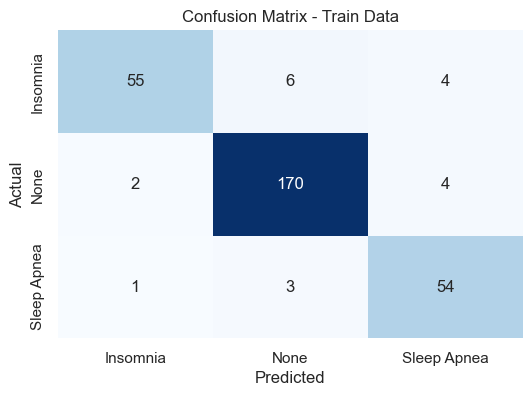

In [49]:
# Confusion matrix untuk data train
conf_matrix_train = confusion_matrix(y_train_encoded, y_pred_train)

# Ukuran grafik
plt.figure(figsize=(6, 4))

#Membuat heatmap dari hasil confusion matrix
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=le.classes_, yticklabels=le.classes_ )

#Judul dan label heatmap
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

#Menampilkan grafik
plt.show()

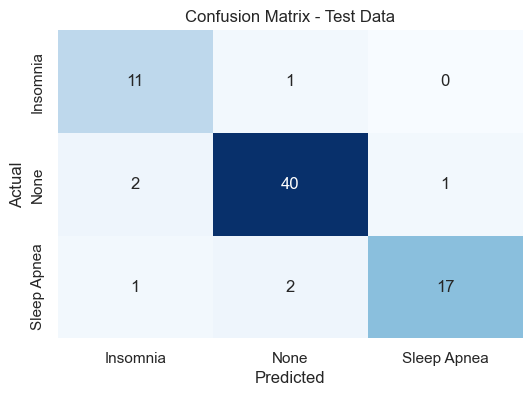

In [50]:
# Confusion matrix untuk data test
conf_matrix_train = confusion_matrix(y_test_encoded, y_pred_test)

# Ukuran grafik
plt.figure(figsize=(6, 4))

#Membuat heatmap dari hasil confusion matrix
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=le.classes_, yticklabels=le.classes_ )

#Judul dan label heatmap
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

#Menampilkan grafik
plt.show()

In [51]:
# Konversi ke pandas Series
y_test_encoded_series = pd.Series(y_test_encoded)
y_pred_test_series = pd.Series(y_pred_test)

# Reset indeks untuk memastikan keselarasan
X_test_capped_reset = X_test_capped.reset_index(drop=True)
y_test_encoded_series_reset = y_test_encoded_series.reset_index(drop=True)
y_pred_test_series_reset = y_pred_test_series.reset_index(drop=True)

# Menggabungkan X_test_capped, y_test_encoded, dan menambahkan kolom y_pred_test
result_df = pd.concat([X_test_capped_reset, y_test_encoded_series_reset.rename('Actual'), y_pred_test_series_reset.rename('Predicted')], axis=1)

# Menampilkan hasil
result_df

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Bp_Systolic,Bp_Diastolic,Actual,Predicted
0,Female,53,Engineer,8.4,9,30,3,Normal,65,5000,125,80,1,1
1,Male,28,Sales Representative,5.9,4,30,8,Obese,84,3000,140,90,2,2
2,Male,44,Salesperson,6.3,6,45,7,Overweight,72,6000,130,85,0,0
3,Female,51,Engineer,8.5,9,30,3,Normal,65,5000,125,80,1,1
4,Female,53,Engineer,8.5,9,30,3,Normal,65,5000,125,80,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Female,38,Accountant,7.1,8,60,4,Normal,68,7000,115,75,1,1
71,Male,43,Engineer,7.8,8,90,5,Normal,70,8000,130,85,1,1
72,Male,30,Doctor,7.7,7,75,6,Normal,70,8000,120,80,1,1
73,Female,50,Nurse,6.0,6,90,8,Overweight,75,10000,140,95,2,2


In [52]:
#Menampilkan False Positif kelas insomnia
print('FALSE POSITIVE - INSOMNIA')
result_df[(result_df['Actual'] != 0) & (result_df['Predicted'] == 0)]

FALSE POSITIVE - INSOMNIA


,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Bp_Systolic,Bp_Diastolic,Actual,Predicted
16,Male,43,Salesperson,6.5,6,45,7,Overweight,72,6000,130,85,2,0
39,Female,45,Teacher,6.6,7,45,4,Overweight,65,6000,135,90,1,0
43,Male,44,Salesperson,6.5,6,45,7,Overweight,72,6000,130,85,1,0


In [53]:
#Menampilkan False Positif kelas None
print('FALSE POSITIVE - NONE')
result_df[(result_df['Actual'] != 1) & (result_df['Predicted'] == 1)]

FALSE POSITIVE - NONE


,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Bp_Systolic,Bp_Diastolic,Actual,Predicted
23,Male,43,Engineer,7.8,8,90,5,Normal,70,8000,130,85,0,1
58,Male,38,Lawyer,7.1,8,60,5,Normal,68,8000,130,85,2,1
62,Male,29,Doctor,6.0,6,30,8,Normal,70,8000,120,80,2,1


In [60]:
#Menampilkan False Positif kelas insomnia
print('FALSE POSITIVE - SLEEP APNEA')
result_df[(result_df['Actual'] != 2) & (result_df['Predicted'] == 2)]

FALSE POSITIVE - SLEEP APNEA


,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Bp_Systolic,Bp_Diastolic,Actual,Predicted
68,Female,57,Nurse,8.1,9,75,3,Overweight,68,7000,140,95,1,2


## **Insight**

1. Model menghasilkan hasil yang bagus dengan akurasi pada train set sebesar 93% dan pada test set 91%.
2. Model berkinerja baik pada set data pelatihan dengan presisi, recall, dan F1-score tinggi untuk semua kelas.
3. Model khususnya bagus dalam mengidentifikasi kelas 'None', namun kelas 'Insomnia' memiliki presisi yang lebih rendah pada data test, menunjukkan adanya beberapa false positif.
4. False Positif Insomnia
    * Pada kelas insomnia ada 3 pasien yang di deteksi insomnia namun actual nya adalah 2 pasien dengan keadaan normal dan 1 pasien dengan sleep apnea.
    * Jika di lihat pada perbandingan tabel dengan karakteristik berdasarkan EDA yang di lakukan orang-orang yang false positif ini mempunyai ciri-ciri yang condong kepada insomnia walau pada data asli nya mereka tidak di diagnona insomnia, sehingga kita bisa simpulkan mereka mempunyai kecendrungan untuk mengidap insomnia pada masa depan.

5. False Positif None
    * Pada kelas None ada 1 pasien di prediksi normal padahal harusnya insomnia dan pada pasien sleep apnea ada 2 pasien yang di deteksi normal.
    * Untuk false positif None, berdasarkan tabel menunjukan ciri-ciri ke arah normal yang kemungkinan dalam data asli ada pengaruh lain yang mempengaruhi diagnosis sleep disorder nya, sehingga perlu dilakukan penambahan feature lain untuk mengurangi false positif ini.

4. False Positif Sleep Apnea
    * Pada kelas Sleep Apnea ada 1 false positif, dimana harusnya 1 orang normal namun di deteksi sleep apnea.
    * Untuk false positif Sleep Apnea, berdasarkan tabel menunjukan ciri-ciri ke arah sleep apnea walau pada data asli nya mereka tidak di diagnona sleep apnea, sehingga bisa simpulkan mereka mempunyai kecendrungan untuk mengidap insomnia pada masa depan.
    
5. Hal ini bisa saja di pengaruhi karena data yang digunakan dalam model kurang, sehingga perlu untuk melakukan penambahan data dan feature sehingga bisa menghasilkan hasil prediksi yang lebih baik.

# **Model Saving**

In [55]:
#Menyimpan file model
with open('model.pkl', 'wb') as file_1:
  pickle.dump(final_model, file_1)
  
#Menyimpan file classes
with open('classes.pkl', 'wb') as file_1:
  pickle.dump(classes, file_1)

# **Pengambilan Kesimpulan**

1. Pasien dengan diagnosa insomnia mempunyai ciri-ciri sebagai berikut :
    * Umur rentan 40-55 tahun.
    * Mempunyai aktifitas fisik yang rendah atau kurang berolahraga untuk menggerakkan fisiknya.
    * BMI masuk dalam kategori overweight, atau berat badan lebih dari normal.
    * Waktu tidur kurang dan quality tidur yang rendah.
    * Blood preasure di atas 125/85 atau pasien dengan indikasi ke arah hipertensi.
    * Pekerjaan seperti sales, guru dan akuntan rentan terkena insomnia.
    * Atau dapat di ambil kesimpulan bahwa insomnia terjadi karena kurangnya aktifitas dan keadaan fisik pada tubuh, sehingga hal yang bisa di sarankan untuk pasien adalah melakukan olahraga secara teratur, menurunkan berat badan, menjaga pola makan dan menjauhi makanan yang meningkatkan hipertensi seperti makanan tinggi garam, makanan cepat saji, tinggi lemak dan sejenis nya.

2. Pasien dengan diagnosa sleep apnea mempunyai ciri-ciri sebagai berikut :
    * Umur lebih dari 45 tahun.
    * Aktifitasi fisik terlalu banyak atau sering kelelahan.
    * Tidur yang tidak teratur, atau terlalu banyak atau terlalu sedikit.
    * Blood preasure di atas 130/90.
    * Pekerjaan yang berhubungan langsung atau berinteraksi sesama manusia seperti perawat, dokter dan guru rentan terkena sleep apnea.
    * Atau dapat diambil kesimpulan bahwa sleep apnea terjadi karena faktor umur, terlalu banyak beraktifitas berat atau kelelahan, tekanan darah tinggi sehingga hal yang bisa disarankan adalah mengurangi aktifitas berat yang dapat membuat kelelahan, melakukan olahraga secara teratur dan tidak berlebihan, mengatur pola tidur, menurunkan berat badan, dan menjaga pola makan dan menjauhi makanan yang meningkatkan hipertensi seperti makanan tinggi garam, makanan cepat saji, tinggi lemak dan sejenis nya.

3. Pasien dengan none diagnosa sleep order mempunyai ciri-ciri sebagai berikut :
    * Berat badan normal.
    * Mempunyai aktifitas fisik dan kualitas tidur yang yang stabil.
    * Blood preasure <130/<85, atau pada batas normal.
    * Atau dapat di amil kesimpulan bahwa pasien normal mempunyai berat badan normal dan aktifitas fisik yang stabil.
    * Sehingga saran yang bisa di berikan adalah jaga olahraga teratur, jaga berat badan, jaga pola makan dan hindari makanan yang mengakibatkan hipertensi seperti makanan tinggi garam, makanan cepat saji, tinggi lemak dan sejenis nya.

4. Algoritma yang cocok dengan dataset adalah menggunakan RandomForestCassifier dengan nilai akurasi 0.91 dan F1 Score: 0.91 dan setelah pembuktian dengan cross validation nilai F1 score ini masih dalam range rata-rata F1 Score.
5. Untuk parameter dengan hasil terbaik berdasarkan hyperparameter tuning adalah 

    ```
    'RandomForest__bootstrap': True, 
    'RandomForest__max_depth': 10, 
    'RandomForest__min_samples_leaf': 1, 
    'RandomForest__min_samples_split': 5, 
    'RandomForest__n_estimators': 100.
    ```

6. Pada predict final menggunakan hyperparameter terbaik akurasi prediksi pada train set sebesar 93% data berhasil di prediksi dan pada test 91%, hal ini menunjukan prediksi menghasilkan goodfit.
7. Model cenderung baik dalam memprediksi semua kelas.
8. Model khususnya bagus dalam mengidentifikasi kelas 'None', namun pada kelas 'Insomnia' memiliki presisi yang lebih rendah pada test set data, menunjukkan adanya beberapa false positif, namun setelah di explore false positif ini sebenarnya memiliki ciri-ciri yang sesuai dengan hasil EDA sehingga bisa di simpulkan bahwa pasien mempunyai kecendrungan untuk mengidap penyakit sesuai hasil prediksi walau belum mempunyai sleep order tersebut, sehingga pasien dapat lebih aware dan bisa menerapkan hidup sehat untuk terhindar dengan sleep order tersebut.
9. Perlu dipertimbangkan untuk mengevaluasi dan meningkatkan kinerja model dengan melakukan penambahan data secara keseluruhan sehingga bisa menghasilkan hasil prediksi yang lebih baik.
10. Menambahkan beberapa feature yang lain yang dapat menambah keakuratan dalam prediksi.